In [1]:
import os
import sys

sys.path.append(os.path.abspath("../.."))

from primeGraph import Graph, START, END

## Basic Usage


In [2]:
from primeGraph.buffer import History, LastValue, Incremental
from primeGraph.models import GraphState

class DocumentProcessingState(GraphState):
    processed_files: History[str]  # Keeps track of all processed files
    current_status: LastValue[str]  # Current processing status
    number_of_executed_steps: Incremental[int]  # Counter for processed documents

# Initialize state
state = DocumentProcessingState(
    processed_files=[],
    current_status="initializing",
    number_of_executed_steps=0
)

# Create graph
graph = Graph(state=state)

@graph.node()
def load_documents(state):
    # Simulate loading documents
    return {
        "processed_files": "document1.txt",
        "current_status": "loading",
        "number_of_executed_steps": 1
    }

@graph.node()
def validate_documents(state):
    # Validate loaded documents
    return {
        "current_status": "validating",
        "number_of_executed_steps": 1
    }

@graph.node()
def process_documents(state):
    # Process documents
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }

# Connect nodes
graph.add_edge(START, "load_documents")
graph.add_edge("load_documents", "validate_documents")
graph.add_edge("validate_documents", "process_documents")
graph.add_edge("process_documents", END)

# Compile and execute
graph.compile()
graph.start()

DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: validate_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: process_documents


'chain_ff5d1199-1bf4-4a50-aa4d-4c69f5f5f849'

In [3]:
state

DocumentProcessingState(version='c64f5b84d577e2b4b15121054d5d7509', processed_files=['document1.txt'], current_status='completed', number_of_executed_steps=3)

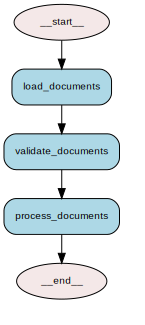

In [4]:
graph.visualize()

## Router Nodes


In [5]:
from primeGraph.buffer import History, LastValue, Incremental
from primeGraph.models import GraphState

class DocumentProcessingState(GraphState):
    processed_files: History[str]  # Keeps track of all processed files
    current_status: LastValue[str]  # Current processing status
    number_of_executed_steps: Incremental[int]  # Counter for processed documents

# Initialize state
state = DocumentProcessingState(
    processed_files=[],
    current_status="initializing",
    number_of_executed_steps=0
)

# Create graph
graph = Graph(state=state)

@graph.node()
def load_documents(state):
    # Simulate loading documents
    return {
        "processed_files": "document1.txt",
        "current_status": "loading",
        "number_of_executed_steps": 1
    }

@graph.node()
def validate_documents(state):
    # Validate loaded documents
    return {
        "current_status": "validating",
        "number_of_executed_steps": 1
    }

@graph.node()
def process_documents(state):
    # Process documents
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }

@graph.node()
def route_documents(state):
    # Route based on document type
    if "invoice" in state.current_status:
        return "process_invoice"
    return "cancel_invoice"

@graph.node()
def process_invoice(state):
    return {"current_status": "invoice_processed", "number_of_executed_steps": 1}

@graph.node()
def cancel_invoice(state):
    return {"current_status": "invoice_cancelled", "number_of_executed_steps": 1}

# Connect nodes
graph.add_edge(START, "load_documents")
graph.add_edge("load_documents", "validate_documents")
graph.add_edge("validate_documents", "process_documents")


# Add router edges
graph.add_router_edge("process_documents", "route_documents")
graph.add_edge("process_invoice", END)
graph.add_edge("cancel_invoice", END)

# Compile and execute
graph.compile()
graph.start()

DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: validate_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: process_documents
DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: validate_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: process_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: route_documents
DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: group_cancel_invoice


'chain_4f48dcf4-1e2f-4a0a-bea5-f55f44814335'

In [6]:
state

DocumentProcessingState(version='c64f5b84d577e2b4b15121054d5d7509', processed_files=['document1.txt'], current_status='invoice_cancelled', number_of_executed_steps=4)

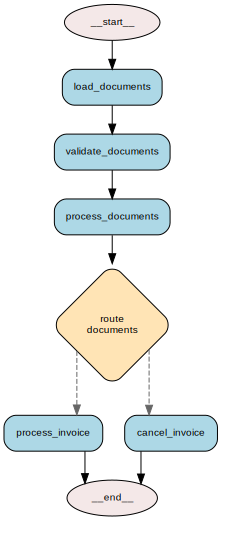

In [7]:
graph.visualize()

## Repeatable Nodes


In [8]:
from primeGraph.buffer import History, LastValue, Incremental
from primeGraph.models import GraphState

class DocumentProcessingState(GraphState):
    processed_files: History[str]  # Keeps track of all processed files
    current_status: LastValue[str]  # Current processing status
    number_of_executed_steps: Incremental[int]  # Counter for processed documents

# Initialize state
state = DocumentProcessingState(
    processed_files=[],
    current_status="initializing",
    number_of_executed_steps=0
)

# Create graph
graph = Graph(state=state)

@graph.node()
def load_documents(state):
    # Simulate loading documents
    return {
        "processed_files": "document1.txt",
        "current_status": "loading",
        "number_of_executed_steps": 1
    }

@graph.node()
def validate_documents(state):
    # Validate loaded documents
    return {
        "current_status": "validating",
        "number_of_executed_steps": 1
    }

@graph.node()
def process_documents(state):
    # Process documents
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }

@graph.node()
def repeating_process_batch(state):
    return {
        "processed_files": f"batch_{state.number_of_executed_steps}",
        "number_of_executed_steps": 1
    }

@graph.node()
def conclude_documents(state):
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }



# Connect nodes
graph.add_edge(START, "load_documents")
graph.add_edge("load_documents", "validate_documents")
graph.add_edge("validate_documents", "process_documents")


# Add repeating edge to process multiple batches
graph.add_repeating_edge("process_documents", "repeating_process_batch", "conclude_documents", repeat=3, parallel=True) 

graph.add_edge("conclude_documents", END)

# Compile and execute
graph.compile()
graph.start()

DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: validate_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: process_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: group_repeating_process_batch_repeating_process_batch_3_003_repeating_process_batch_2_003
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: conclude_documents


'chain_e47f7b25-d821-49f5-b719-ab3d61b111f1'

In [9]:
state

DocumentProcessingState(version='c64f5b84d577e2b4b15121054d5d7509', processed_files=['document1.txt', 'batch_3', 'batch_4', 'batch_5'], current_status='completed', number_of_executed_steps=7)

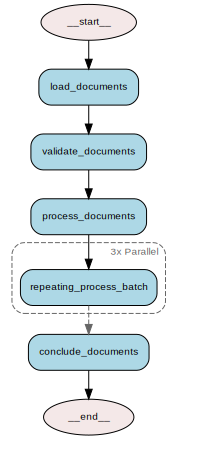

In [10]:
graph.visualize()

## Subgraphs


In [11]:
from primeGraph.buffer import History, LastValue, Incremental
from primeGraph.models import GraphState

class DocumentProcessingState(GraphState):
    processed_files: History[str]  # Keeps track of all processed files
    current_status: LastValue[str]  # Current processing status
    number_of_executed_steps: Incremental[int]  # Counter for processed documents

# Initialize state
state = DocumentProcessingState(
    processed_files=[],
    current_status="initializing",
    number_of_executed_steps=0
)

# Create graph
main_graph = Graph(state=state)

@main_graph.node()
def load_documents(state):
    # Simulate loading documents
    return {
        "processed_files": "document1.txt",
        "current_status": "loading",
        "number_of_executed_steps": 1
    }

# a subgbraph decorator is execting the function (which is now a new node) to return a subgraph
# you can either declare your subgraph in the function or reference from an existing subgraph
@main_graph.subgraph() 
def validation_subgraph():
    subgraph = Graph(state=state)

    @subgraph.node()
    def check_format(state):
        return {"current_status": "checking_format"}

    @subgraph.node()
    def verify_content(state):
        return {"current_status": "verifying_content"}

    subgraph.add_edge(START, "check_format")
    subgraph.add_edge("check_format", "verify_content")
    subgraph.add_edge("verify_content", END)

    return subgraph

@main_graph.node()
def pre_process_documents(state):
    # Process documents
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }


@main_graph.node()
def conclude_documents(state):
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }



# Connect nodes
main_graph.add_edge(START, "load_documents")
main_graph.add_edge("load_documents", "validation_subgraph") # subgreaph added as a normal node
main_graph.add_edge("load_documents", "pre_process_documents")
main_graph.add_edge("validation_subgraph", "conclude_documents")
main_graph.add_edge("pre_process_documents", "conclude_documents")
main_graph.add_edge("conclude_documents", END)

# Compile and execute
main_graph.compile()
main_graph.start()

DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: group_pre_process_documents_(validation_subgraph_check_format_validation_subgraph_verify_content)
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: group_pre_process_documents_(validation_subgraph_check_format_validation_subgraph_verify_content)
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: group_pre_process_documents_(validation_subgraph_check_format_validation_subgraph_verify_content)
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: conclude_documents


'chain_974269d7-7908-43a4-883f-930075a118b5'

In [12]:
state

DocumentProcessingState(version='c64f5b84d577e2b4b15121054d5d7509', processed_files=['document1.txt'], current_status='completed', number_of_executed_steps=3)

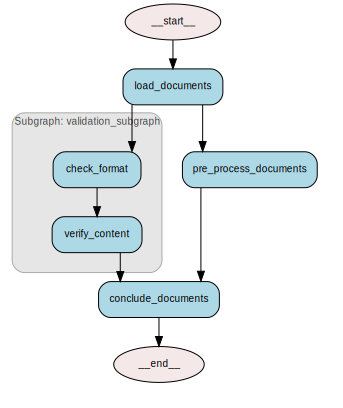

In [13]:
main_graph.visualize()

## Flow Control


In [14]:
from primeGraph.buffer import History, LastValue, Incremental
from primeGraph.models import GraphState

class DocumentProcessingState(GraphState):
    processed_files: History[str]  # Keeps track of all processed files
    current_status: LastValue[str]  # Current processing status
    number_of_executed_steps: Incremental[int]  # Counter for processed documents

# Initialize state
state = DocumentProcessingState(
    processed_files=[],
    current_status="initializing",
    number_of_executed_steps=0
)

# Create graph
graph = Graph(state=state)

@graph.node()
def load_documents(state):
    # Simulate loading documents
    print("load_documents")
    return {
        "processed_files": "document1.txt",
        "current_status": "loading",
        "number_of_executed_steps": 1
    }

# using interrupt="before" will interrupt the execution before this node is executed
# using interrupt="after" will interrupt the execution after this node is executed
@graph.node(interrupt="before")
def review_documents(state):
    # Validate loaded documents
    print("review_documents")
    return {
        "current_status": "validating",
        "number_of_executed_steps": 1
    }

@graph.node()
def process_documents(state):
    # Process documents
    print("process_documents")
    return {
        "current_status": "completed",
        "number_of_executed_steps": 1
    }

# Connect nodes
graph.add_edge(START, "load_documents")
graph.add_edge("load_documents", "review_documents")
graph.add_edge("review_documents", "process_documents")
graph.add_edge("process_documents", END)

# Compile and execute
graph.compile()
graph.start()

DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.PAUSE
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: review_documents


load_documents


'chain_d01875ed-29f2-4028-8e01-a8f5890d51f4'

In [15]:
state

DocumentProcessingState(version='c64f5b84d577e2b4b15121054d5d7509', processed_files=['document1.txt'], current_status='loading', number_of_executed_steps=1)

In [16]:
graph.resume()
state

DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: load_documents
DEBUG:primeGraph.graph.executable:Chain status updated to: ChainStatus.RUNNING
DEBUG:primeGraph.graph.executable:Checkpoint saved after node: review_documents


review_documents


DEBUG:primeGraph.graph.executable:Checkpoint saved after node: process_documents


process_documents


DocumentProcessingState(version='c64f5b84d577e2b4b15121054d5d7509', processed_files=['document1.txt'], current_status='completed', number_of_executed_steps=3)

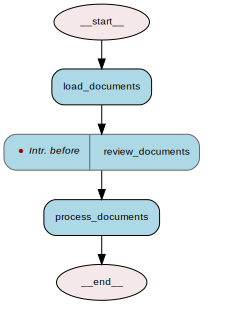

In [17]:
graph.visualize()